In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("bill_authentication.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

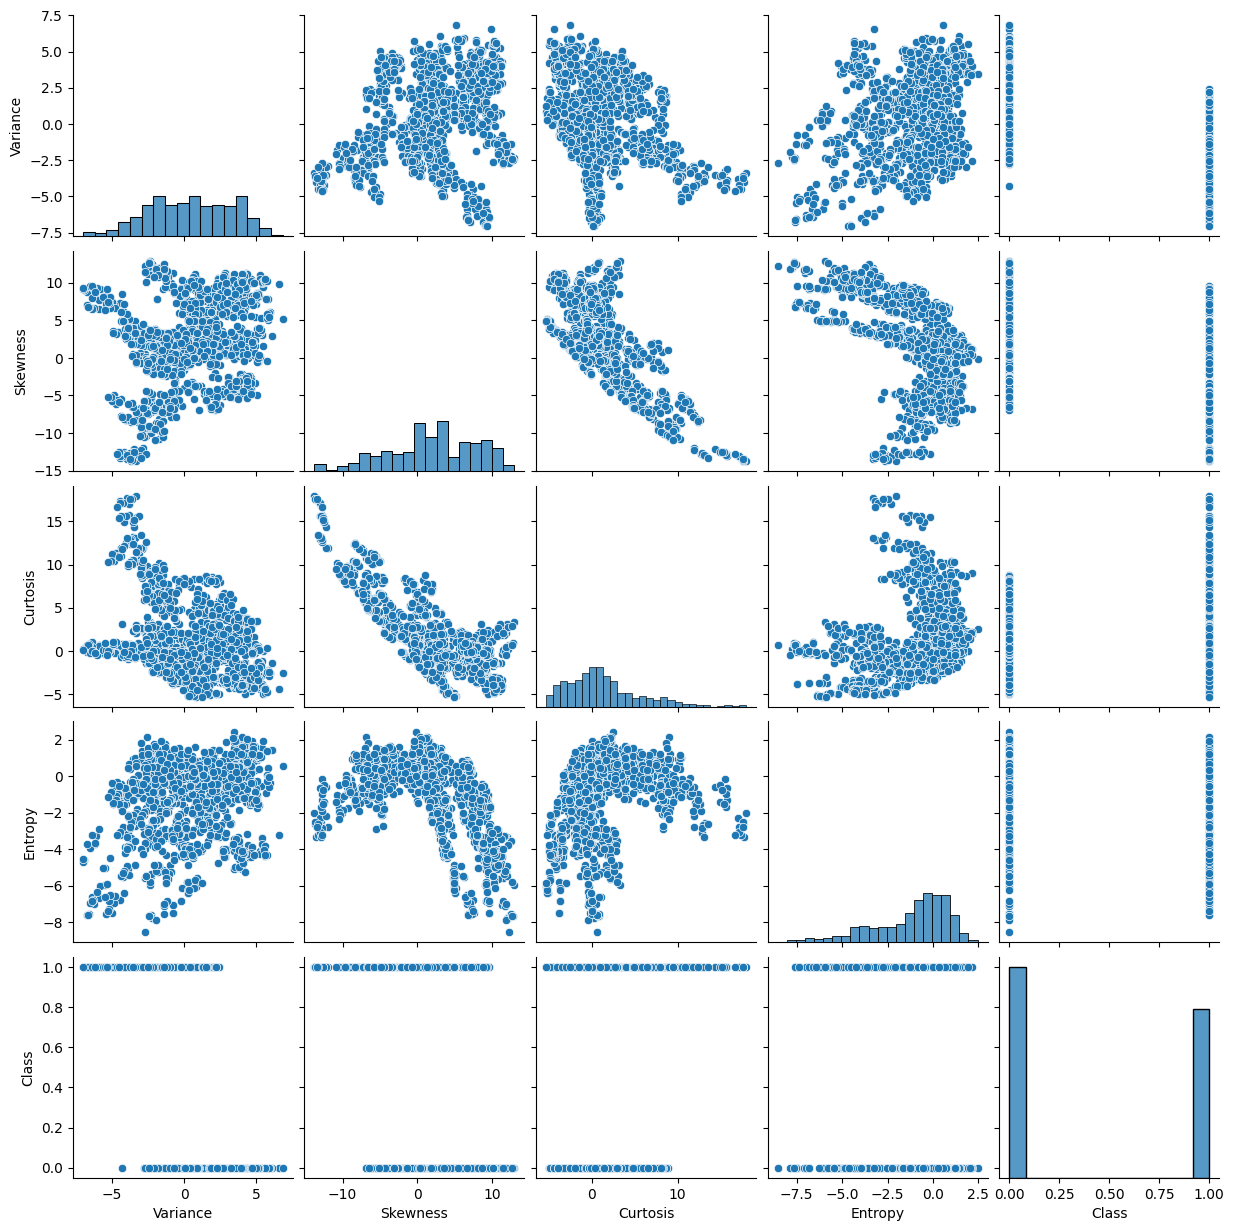

In [8]:
sns.pairplot(df)

<AxesSubplot: >

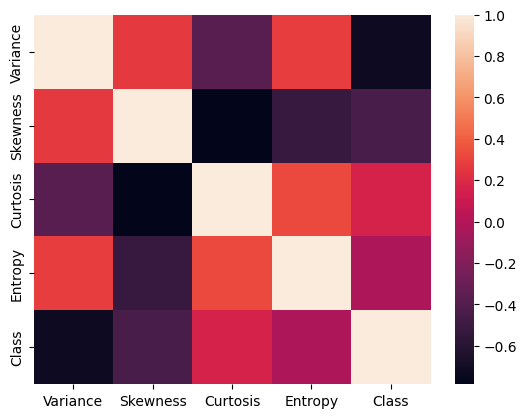

In [9]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='Class', ylabel='Variance'>

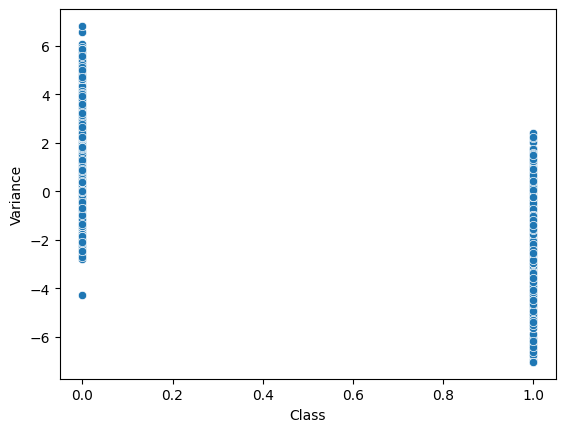

In [10]:
sns.scatterplot(x='Class',y='Variance',data=df)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df.columns.tolist()

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [13]:
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
Y = df['Class']

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=0)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtc = DecisionTreeClassifier()

In [17]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
prediction = dtc.predict(X_test)
prediction

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [19]:
dtc.score(X_train,Y_train)

1.0

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[566  51]
 [ 10 471]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       617
           1       0.90      0.98      0.94       481

    accuracy                           0.94      1098
   macro avg       0.94      0.95      0.94      1098
weighted avg       0.95      0.94      0.94      1098



In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=200)

In [24]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
pred = rfc.predict(X_test)
pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[583  34]
 [  0 481]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       617
           1       0.93      1.00      0.97       481

    accuracy                           0.97      1098
   macro avg       0.97      0.97      0.97      1098
weighted avg       0.97      0.97      0.97      1098



In [27]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#### checking that model is prediction correct or not

In [28]:
rfc.predict([[3.62160,8.6661,-2.8073,-0.44699]]) # 0th index data

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [29]:
df[df['Class'] == 1].head()

,Variance,Skewness,Curtosis,Entropy,Class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1


In [30]:
rfc.predict([[-1.39710,	3.31910,-1.392700,-1.99480]])

c:\Users\anuku\miniconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [31]:
from sklearn.tree import plot_tree

[Text(0.640625, 0.9285714285714286, 'x[0] <= 0.856\ngini = 0.498\nsamples = 274\nvalue = [145, 129]'),
 Text(0.40625, 0.7857142857142857, 'x[1] <= 5.865\ngini = 0.328\nsamples = 145\nvalue = [30, 115]'),
 Text(0.25, 0.6428571428571429, 'x[0] <= 0.565\ngini = 0.085\nsamples = 113\nvalue = [5, 108]'),
 Text(0.125, 0.5, 'x[3] <= 0.634\ngini = 0.055\nsamples = 106\nvalue = [3, 103]'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.0\nsamples = 85\nvalue = [0, 85]'),
 Text(0.1875, 0.35714285714285715, 'x[1] <= 1.078\ngini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(0.125, 0.21428571428571427, 'x[3] <= 0.688\ngini = 0.1\nsamples = 19\nvalue = [1, 18]'),
 Text(0.0625, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.07142857142857142, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'x[1] <= 0.133\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.3125, 0.3571428571

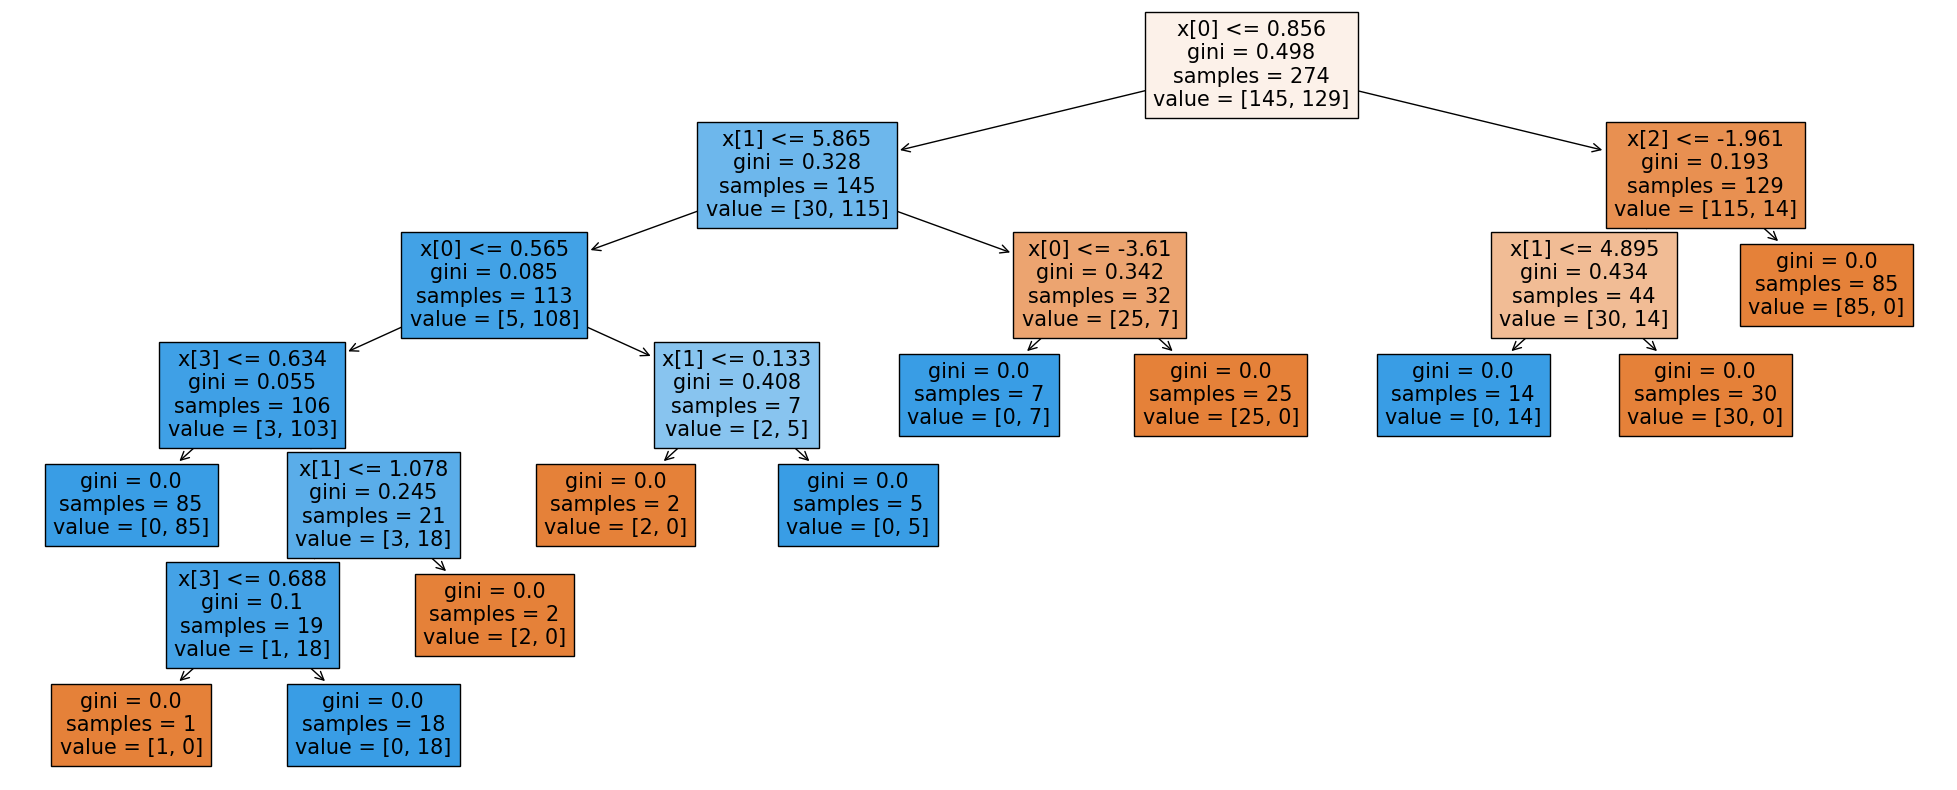

In [32]:
plt.figure(figsize=(25,10))
plot_tree(dtc,filled=True)